In [387]:
from pynq import Overlay
from pynq import Xlnk
import pynq.lib.dma
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [388]:
def my_transform(img):
    img = img.resize((28,28))
    im_data = np.array(img).astype(np.float32)
    im_data = im_data.transpose(2,0,1)
    for i in range(im_data.shape[0]):
        im_data[i,:,:] = (im_data[i,:,:] - np.mean(im_data[i,:,:])) / np.std(im_data[i,:,:])
    return im_data

In [389]:
overlay = Overlay('overlay/cnn_robot.bit')
xlnk = Xlnk()
x = xlnk.cma_array(shape=(3,28,28), dtype=np.float32)
y = xlnk.cma_array(shape=(6), dtype=np.float32)

input_ch = overlay.axi_dma_0.sendchannel
output_ch = overlay.axi_dma_0.recvchannel

--- Opening /dev/video0...
Trying source module v4l2...
/dev/video0 opened.
No input was specified, using the first.
Adjusting resolution from 384x288 to 640x480.
--- Capturing frame...
Captured frame in 0.00 seconds.
--- Processing captured image...
Disabling banner.
Writing JPEG image to '/home/xilinx/jupyter_notebooks/common/data/webcam.jpg'.
Writing JPEG image to '2'.


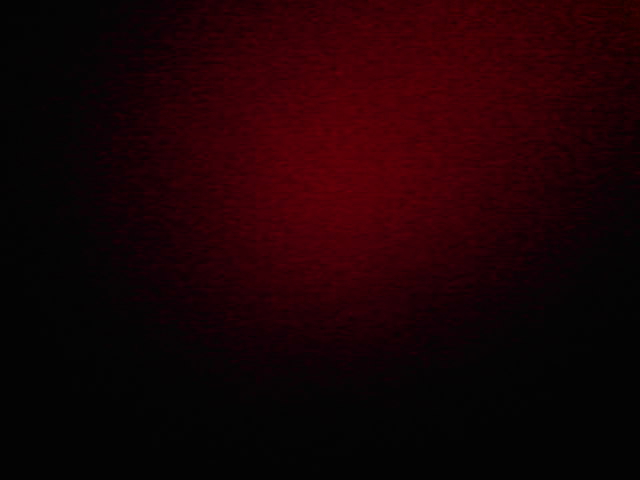

In [390]:
orig_img_path = '/home/xilinx/jupyter_notebooks/common/data/webcam.jpg'
# !fswebcam  --no-banner --save {orig_img_path} -d /dev/video0 2> /dev/null
!fswebcam  --no-banner --save {orig_img_path} -d /dev/video0 2

img = Image.open(orig_img_path)
img

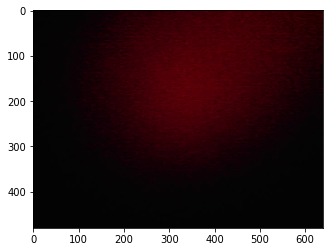

In [391]:
plt.imshow(img)
plt.show()
img_data = my_transform(img)
for i in range(3):
    for j in range(28):
        for k in range(28):
            x[i][j][k] = img_data[i][j][k]

In [392]:
input_ch.transfer(x)
output_ch.transfer(y)
output_ch.wait()
print('y', y)
print('pred class: ', np.argmax(y))

class_num = {
    0 : 'pikaqiu' ,
    1 : 'miaowazhongzi' ,
    2 : 'jienigui' ,
    3 : 'xiaohuolong' ,
    4 : 'yibu' ,
    5 : 'kabishou'
}
print(class_num[np.argmax(y)])

y [  8.31047153 -43.68712616 -16.04406357  35.49250031   8.79741573
  -4.46944618]
pred class:  3
xiaohuolong
